# Libraries

In [2]:
%%capture

!pip install numpy
!pip install pybamm
!pip install scikit-learn
!pip install fastsim

# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import glob
import os
import math
#import fastsim
#import pybamm

## EDA

In [3]:
path = "SC03_HS_TEST"

# Lista todos os arquivos .txt
txt_list = glob.glob(os.path.join(path, "*.txt"))

dfs = []

In [4]:
for txt in txt_list:
    # Extrai TEST ID
    test_id = int(os.path.basename(txt).split()[0])
    
    # Lê o arquivo .txt
    df = pd.read_csv(txt, sep="\t")
    
    # Adiciona coluna "Test_id"
    df["Test_id"] = test_id
    
    dfs.append(df)

In [5]:
# Concatena tudo
df = pd.concat(dfs, ignore_index=True)

In [6]:
# Coloca "Test_id" como a primeira coluna e ordena para começar no primeiro "Test_id"
columns = ["Test_id"] + [col for col in df.columns if col != "Test_id"]
df = df[columns]

df = df.sort_values(by="Test_id").reset_index(drop=True)

In [7]:
df.head(5)

,Test_id,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_RH[%],Test_Cell_Temp[C],Phase_#,Engine_Oil_Temp[C],Engine_Coolant_Temp[C],Engine_Speed[rpm],HV_Battery_Current[A],HV_Battery_Voltage[V],Fuel_Flow_FuelScale[cc/s]
0,61302078,1800.4,0.003,-2.955,38.840,35.989,2.0,93.537,87.0,766.50,-1.670,114.491,0.547
1,61302078,1800.5,0.003,-2.998,38.841,35.988,2.0,93.556,87.0,753.75,-1.630,114.484,0.547
2,61302078,1800.6,0.003,-2.955,38.840,35.988,2.0,93.557,87.0,752.50,-1.919,114.502,0.547
3,61302078,1800.7,0.003,-3.019,38.840,35.989,2.0,93.529,87.0,762.50,-2.364,114.516,0.547
4,61302078,1800.8,0.003,-2.955,38.839,35.990,2.0,93.551,87.0,746.25,-2.284,114.518,0.547


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18121 entries, 0 to 18120
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Test_id                    18121 non-null  int64  
 1   Time[sec]                  18121 non-null  float64
 2   Dyno_Speed[mph]            18121 non-null  float64
 3   Dyno_Tractive_Effort[N]    18121 non-null  float64
 4   Test_Cell_RH[%]            18121 non-null  float64
 5   Test_Cell_Temp[C]          18121 non-null  float64
 6   Phase_#                    18121 non-null  float64
 7   Engine_Oil_Temp[C]         18121 non-null  float64
 8   Engine_Coolant_Temp[C]     18121 non-null  float64
 9   Engine_Speed[rpm]          18121 non-null  float64
 10  HV_Battery_Current[A]      18121 non-null  float64
 11  HV_Battery_Voltage[V]      18121 non-null  float64
 12  Fuel_Flow_FuelScale[cc/s]  18121 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.8 MB


In [9]:
df.isnull().sum()

Test_id                      0
Time[sec]                    0
Dyno_Speed[mph]              0
Dyno_Tractive_Effort[N]      0
Test_Cell_RH[%]              0
Test_Cell_Temp[C]            0
Phase_#                      0
Engine_Oil_Temp[C]           0
Engine_Coolant_Temp[C]       0
Engine_Speed[rpm]            0
HV_Battery_Current[A]        0
HV_Battery_Voltage[V]        0
Fuel_Flow_FuelScale[cc/s]    0
dtype: int64

In [10]:
print("Total de valores nulos:", df.isnull().sum().sum())

Total de valores nulos: 0


In [11]:
df.shape

(18121, 13)

In [12]:
df["Test_id"].value_counts().sort_index()

Test_id
61302078    18121
Name: count, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Test_id,18121.0,6.130208e+07,0.000000,6.130208e+07,6.130208e+07,6.130208e+07,6.130208e+07,6.130208e+07
Time[sec],18121.0,8.960000e+02,523.122645,-1.000000e+01,4.430000e+02,8.960000e+02,1.349000e+03,1.802000e+03
Dyno_Speed[mph],18121.0,1.430367e+01,16.145519,-2.080000e-01,2.000000e-03,5.892000e+00,2.999800e+01,5.506700e+01
Dyno_Tractive_Effort[N],18121.0,5.884468e+01,1007.731267,-5.021236e+03,-2.955000e+00,-2.846000e+00,2.545970e+02,4.846599e+03
Test_Cell_RH[%],18121.0,3.720887e+01,3.638081,2.949600e+01,3.481700e+01,3.674700e+01,4.017100e+01,4.479400e+01
Test_Cell_Temp[C],18121.0,3.683555e+01,0.845943,3.502800e+01,3.618600e+01,3.697000e+01,3.738700e+01,3.948400e+01
Phase_#,18121.0,9.944264e-01,0.817862,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Engine_Oil_Temp[C],18121.0,9.142260e+01,1.448186,8.745500e+01,9.050300e+01,9.132600e+01,9.262300e+01,9.399500e+01
Engine_Coolant_Temp[C],18121.0,8.632476e+01,1.806473,8.300000e+01,8.500000e+01,8.700000e+01,8.700000e+01,9.300000e+01
Engine_Speed[rpm],18121.0,9.071818e+02,731.492266,0.000000e+00,0.000000e+00,9.145000e+02,1.512750e+03,3.522250e+03


#### Outliers

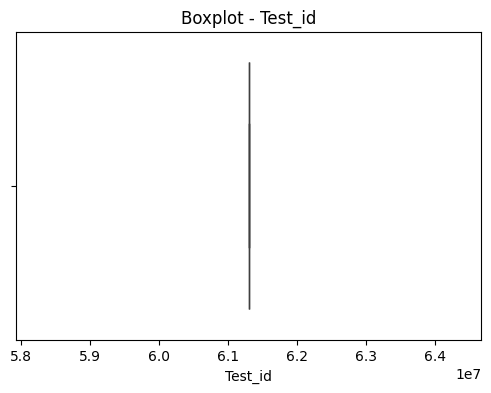

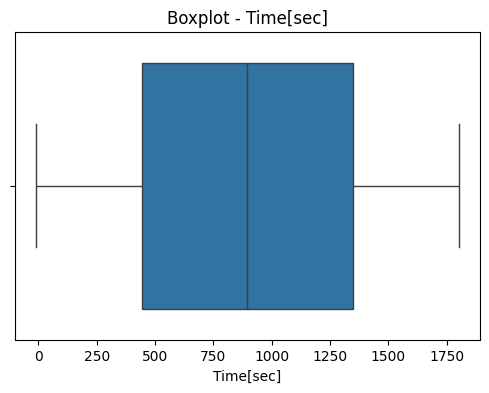

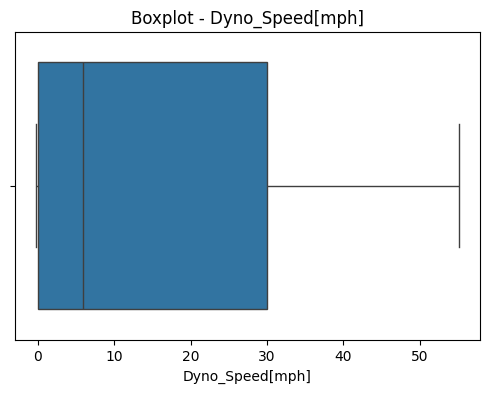

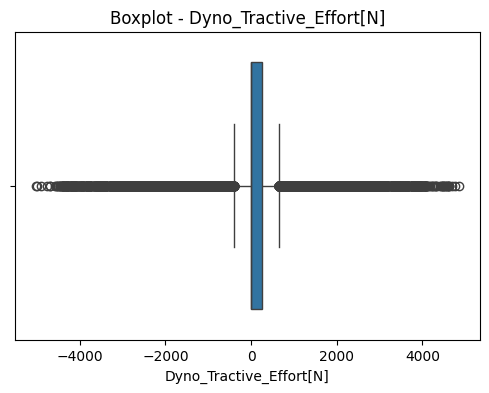

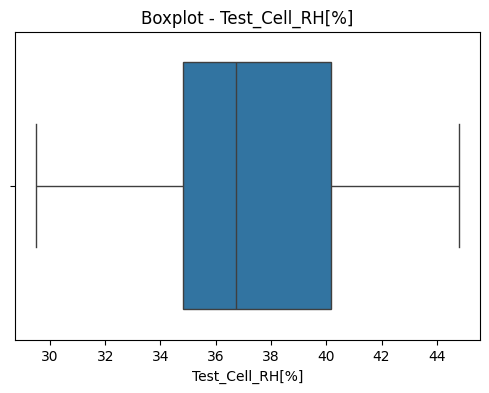

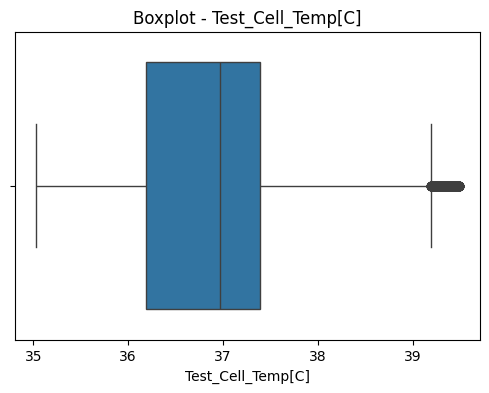

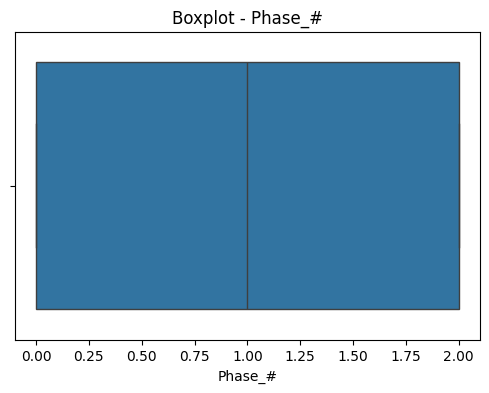

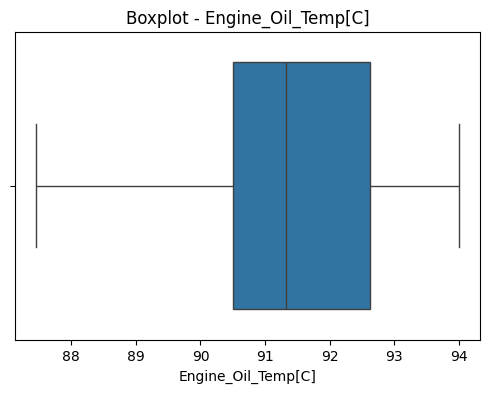

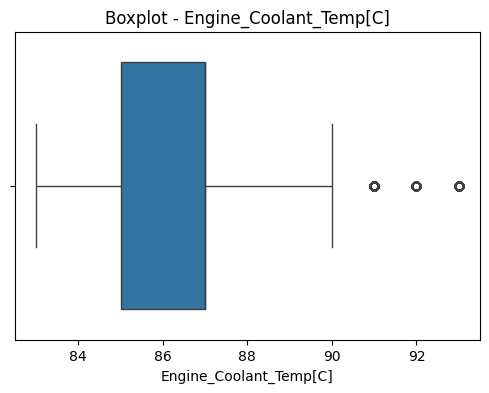

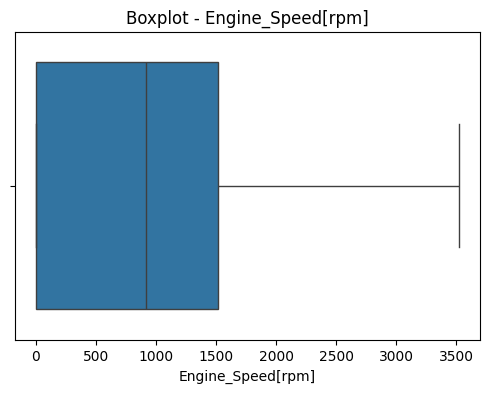

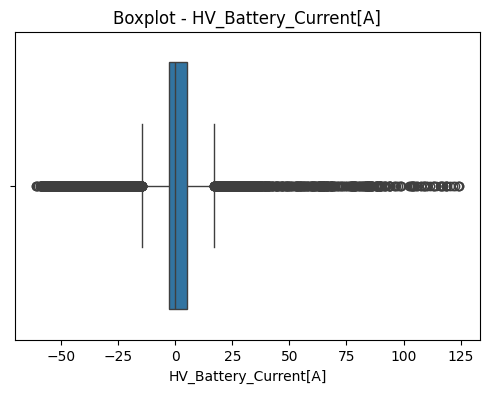

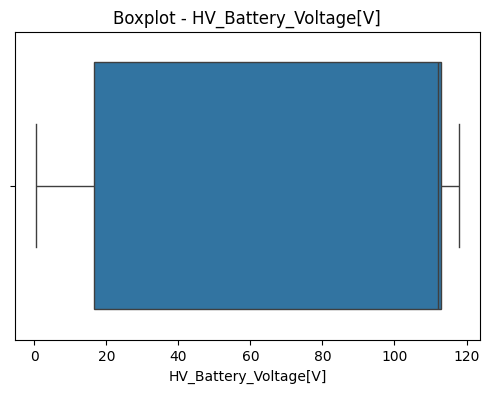

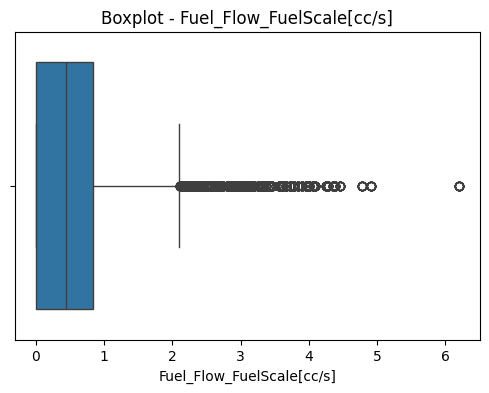

In [14]:
# Gera um boxplot para cada  coluna
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


In [15]:
for col in df.select_dtypes(include=np.number).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)]
    if not outliers.empty:
        print(f"Coluna {col} tem {len(outliers)} outliers")


Coluna Dyno_Tractive_Effort[N] tem 5056 outliers
Coluna Test_Cell_Temp[C] tem 312 outliers
Coluna Engine_Coolant_Temp[C] tem 862 outliers
Coluna HV_Battery_Current[A] tem 2484 outliers
Coluna Fuel_Flow_FuelScale[cc/s] tem 1223 outliers


#### Correlação

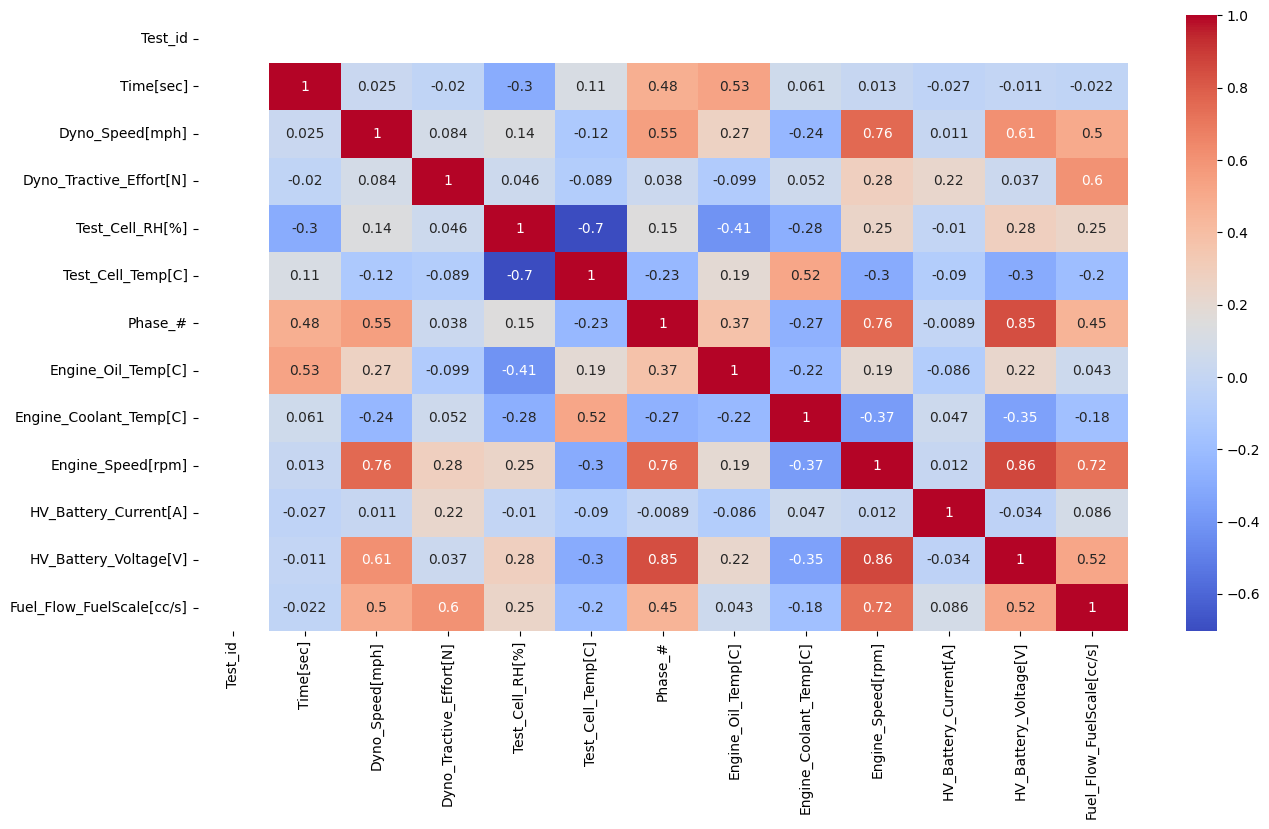

In [16]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
